# Objectifs

Ce carnet vise à réaliser une **segmentation d'image** basée sur l'algorithme **k-means**.

Pour une présentation générale de cette approche, se référer à :
- Youtube <a href="https://www.youtube.com/watch?v=yR7k19YBqiw">Dr Mike Pound</a>.
- GeeksForGeeks <a href="https://www.geeksforgeeks.org/image-segmentation-using-k-means-clustering/">Image Segmentation</a>.
- Mr. Mint <a href="https://mrmint.fr/algorithme-k-means">Algorithme k-means</a>.

Pour des raisons de simplicité nous nous appuierons sur l'implémentation de l'algorithme k-means proposée dans la librairie <a href="https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html">Scikit-Learn</a>, qui est largement suffisante pour notre usage.

# Théorie

## Principe général

L'algorithme K-means est un algorithme de classification non supervisé. Il permet de regrouper les données d'un jeu de données en K classes.

<img class="fit-picture"
     src="./schémas/k-means_cluster.png"
     width="350px"
     alt="K-Means">

Appliquer à une image, cet algorithme permet d'effectuer une segmentation en regroupant ensemble les pixels qui sont similaires en termes de couleurs ou niveaux de gris. 

**Exemple**
<br>Application de l'algorithme K-means pour segmenter l'image de Super Mario.

<img class="fit-picture"
     src="./schémas/k-means_example.png"
     width="450px"
     alt="K-Means">

## Description de l'algorithme k-means

Son fonctionnement est le suivant :

0. Initialisation : Sélectionner K points (au hasard dans le jeu de données ou dans l'ensemble de l'espace à explorer) qui seront les K centroïdes.
1. Construire les classes, une classe par centroïde. Chaque point du jeu de données appartient à la classe du centroïde le plus proche (en norme euclidienne ou norme 1 de préférence).
2. Définir les baraycentres des classes comme nouveaux nouveaux centroïdes.
3. Fin : Répéter les étapes 1 à 2 jusqu'à convergence (stabilisation des centroïdes ou de la variance des classes $V = \sum_{j} \sum_{x_{i} \in c_{j}} D(c_{j},{x_{i}})^{2} $).

## Remarques

**Généralisation en dimension N**
<br>Cet algorithme est souvent présenté pour des points dans le plan (dimension 2). Dans les faits, les notions utilisées (distance, barycentre, interie) se généralisent très facilement à une dimension N quelconque.
<br>Pour une image en couleur, nous avons alors : $x_{i}=(R,G,B) \space et \space N=3$ 

**Critère de convergence**
<br>La convergence de l'algorithme n'est pas du tout garantie. Il est donc nécessaire de prévoir un garde-fou (exemple nombre d'itérations maximum) dans l'implémentation de l'algorithme pour éviter d'être enfermé dans une boucle sans fin.

**Optimums locaux**
<br>Les centroïdes peuvent converger vers un optimum local différent de l'optimum global. Autrement dit, plusieurs partionnements différents sont possibles pour un même jeu de données et nombre de centroïdes.
<br>Pour pallier ce défaut, il est possible de lancer plusieurs fois l'algorithme en initialisant avec des valeurs différentes.

**Choix du paramètre K**
<br>Le résultat final est très sensible à la valeur du paramètre K. Un K trop faible débouche sur un partionnement grossier et un K trop élevé est synonyme de classes trop segmentées ce qui est contraire à la notion même de classe. Il existe donc un K idéal pour chaque problème (compromis entre biais et variance).
<br>Si nous représentons le niveau d'inertie en fonction de la valeur de K, nous voyons une courbe en "forme de bras". La "meilleure" valeur de K est celle du coude (autour de 3 dans l'exemple ci-dessous).
<br>Cette méthode s'applique aussi dans d'autres contextes et s'appelle d'ailleurs <a href="https://en.wikipedia.org/wiki/Elbow_method_(clustering)">Elbow method</a> en anglais.

<img class="fit-picture"
     src="./schémas/k_means_elbow.png"
     width="350px"
     alt="K-Means">

## Références

**Articles**
<br>\- Mr.Mint <a href="https://mrmint.fr/algorithme-k-means">Algorithme K-Means</a>
<br>\- Data Analytics Poste <a href="https://dataanalyticspost.com/Lexique/k-means-ou-k-moyennes/">K-Means (ou K-Moyennes)</a>
<br>\- Geeks For Geeks <a href="https://www.geeksforgeeks.org/image-segmentation-using-k-means-clustering/">Image Segmentation using K-Means Clustering</a>

**Code**
<br>\- Redirection et traitement des messages postés dans la console Jupyter <a href="https://stackoverflow.com/questions/54952726/jupyter-notebook-output-redirection">Stack Overflow</a>
<br>\- Le Data Scientist <a href="https://ledatascientist.com/faire-du-clustering-avec-lalgorithme-k-means/">Faire Du Clustering Avec L’algorithme K-Means</a>
<br>\- Scikit-Learn <a href="https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html">sklearn.cluster.KMeans</a>

# Prise en main de k-means

In [1]:
# chargement des librairies
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import ipyplot
from PIL import Image,ImageFilter,ImageEnhance,ImageChops
from sklearn.cluster import KMeans
from matplotlib.colors import ListedColormap

In [2]:
# configuration globale
%matplotlib inline
plt.style.use('seaborn-whitegrid')

Exemple pour un premier jeu de données simple :

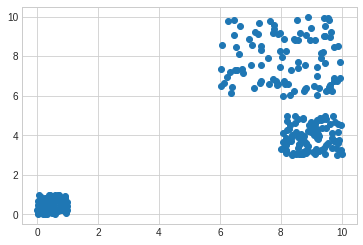

In [3]:
# génération d'un jeu de données aléatoire
data_set_1 = 1*np.random.rand(100,2)
data_set_2 = 4*np.random.rand(100,2)
data_set_3 = 2*np.random.rand(100,2)
 
x = np.concatenate((data_set_1[0:,0], data_set_2[0:,0] + 6, data_set_3[0:,0] + 8))
y = np.concatenate((data_set_1[0:,1], data_set_2[0:,1]+ 6, data_set_3[0:,1] + 3))
data_set = np.dstack((x,y)).squeeze()
plt.scatter(data_set[:,0],data_set[:,1])
plt.show()

En lançant l'algorithme K-Means de la librairie Scikit-Learn nous obtenons les résultats ci-dessous :

In [4]:
# définition du modèle et entraînement 
k_scatter = 3
scatter_model = KMeans(k_scatter).fit(data_set)

In [5]:
# visualisation de tous les paramètres du modèle
scatter_model.__dict__

{'n_clusters': 3,
 'init': 'k-means++',
 'max_iter': 300,
 'tol': 0.0001,
 'precompute_distances': 'deprecated',
 'n_init': 10,
 'verbose': 0,
 'random_state': None,
 'copy_x': True,
 'n_jobs': 'deprecated',
 'algorithm': 'auto',
 'n_features_in_': 2,
 '_n_threads': 6,
 '_n_init': 10,
 '_tol': 0.0012540316401293,
 '_algorithm': 'elkan',
 'cluster_centers_': array([[8.18795318, 7.84369513],
        [0.45612506, 0.48785513],
        [8.99589623, 3.89923728]]),
 'labels_': array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        

Nous explorons l'ensemble des attributs de la classe KMeans() une fois notre modèle entraîné. 

Ils renferment des informations précieuses :
* **n_clusters** > Nombre de centroïdes/classes
* **ineria** > Inertie/Variance
* **cluster_centers** > Position des centroïdes
* **labels** > Appartenance des points à l'une ou l'autre des classes
* **tol** > Critère de convergence principal basé sur l'inertie
* **max_iter** > Critère de convergence de sécurité (sert de garde-fou)
* **n_init** > Nombre d'itérations à réaliser (pour trouver un optimum global et non local)
* **verbose** > Génère des logs dans la console pour suivre l'avancement
* **n_threads** > Nombre de coeurs utilisés pour le calcul (par défaut tous)


Nous appliquons la palette de couleurs ci-dessous (issue de Seaborn) pour visualiser les classes obtenues :

In [6]:
# visualisation d'une des palettes de couleurs de Seaborn 
sns.color_palette()

[(0.12156862745098039, 0.4666666666666667, 0.7058823529411765),
 (1.0, 0.4980392156862745, 0.054901960784313725),
 (0.17254901960784313, 0.6274509803921569, 0.17254901960784313),
 (0.8392156862745098, 0.15294117647058825, 0.1568627450980392),
 (0.5803921568627451, 0.403921568627451, 0.7411764705882353),
 (0.5490196078431373, 0.33725490196078434, 0.29411764705882354),
 (0.8901960784313725, 0.4666666666666667, 0.7607843137254902),
 (0.4980392156862745, 0.4980392156862745, 0.4980392156862745),
 (0.7372549019607844, 0.7411764705882353, 0.13333333333333333),
 (0.09019607843137255, 0.7450980392156863, 0.8117647058823529)]

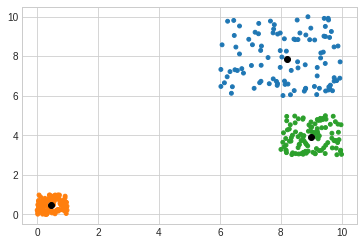

In [7]:
# visualisation des résultats
colors_idx = scatter_model.labels_
cmap_sns = ListedColormap(sns.color_palette(n_colors=k_scatter))
cmap_light = ListedColormap(['darkturquoise','orange','forestgreen'])

plt.scatter(data_set[:,0],data_set[:,1],c=scatter_model.labels_,cmap=cmap_sns,s=15)
for center in scatter_model.cluster_centers_:
    plt.scatter(center[0],center[1], marker='o',c='k')
plt.show()

**Conclusion**
<br>L'algorithme a bien mis en avant les 3 nuages de points et les centroïdes sont bien aux centrex de leurs nuages respectifs.

# Application au traitement d'image

Nous appliquons l'algorithme K-Means de la librairie **Scikit-Learn** au traitement d'image et ajoutons une interface interactive basé sur la librairie **ipywidgets**.

De plus nous **créons une barre de progression** capable d'intercepter les messages de log publiés dans la console par la méthode fit(data,verbose=1,) de la classe KMeans() et de les traduire en un indicateur visuel.

## Démonstration

In [8]:
# chargement des librairies
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import ipyplot
from PIL import Image,ImageFilter,ImageEnhance,ImageChops
from sklearn.cluster import KMeans
from skimage import io,exposure, filters

In [9]:
# custom progress bar to intercept K-Means verbose output 
# and convert it to standard progress bar

import sys
import ipywidgets as widgets
from contextlib import contextmanager


class StreamedProgressBar():   
    
    def __init__(self,value=0,n_min=0,n_max=10,verbose=False):
        self.__oldout = sys.stdout
        self.__bar = widgets.IntProgress(value=value,min=n_min,max=n_max,
                                   bar_style='info',orientation='horizontal',
                                   description='Progress:')
        self.__verbose = verbose

    def write(self, msg):
        if 'Converged' in msg.strip():
            self.__bar.value += 1
        if self.__verbose: # display intercepted messages when asked to
            new_msg = 'intercepted:' if msg.strip() else ''
            self.__oldout.write( new_msg + msg)
            
            
    def flush(self):
        self.__oldout.flush
    
    @contextmanager # most convenient way of implementing with statement
    def convert_stdout_to_progress(self):  
        display(self.__bar) # first show display bar
        sys.stdout = self # redirect console output to our customed progress bar
        try:
            yield
        finally:
            sys.stdout = self.__oldout # restore console output when done

Démonstration pour l'**exemple du château**.

La barre de progression est un objet personnalisé construit spécifiquement pour suivre l'avancement de l'algorithme KMeans en temps réel.

In [10]:
img = np.array(Image.open('./images/castle.jpg'))

In [11]:
data = img.reshape((img.shape[0]*img.shape[1],3), order='C')

k = 5
n_init = 10 # default value : 10
progress_bar = StreamedProgressBar(n_max=n_init)
with progress_bar.convert_stdout_to_progress():
    model = KMeans(n_clusters=k,n_init=n_init,verbose=1).fit(data)

colors = model.cluster_centers_
colors = colors.astype('uint8')

predicted_idx = model.predict(data)
prediction = np.zeros((img.shape[0]*img.shape[1],3), dtype='uint8')
for i in range(prediction.shape[0]):
    prediction[i] = colors[predicted_idx[i]]
new_img = prediction.reshape(img.shape)

IntProgress(value=0, bar_style='info', description='Progress:', max=10)

Couleurs des classes :


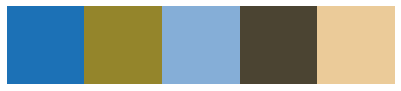


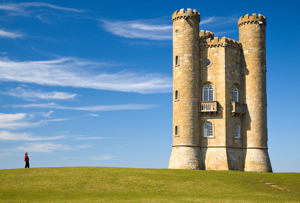
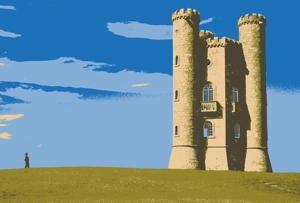


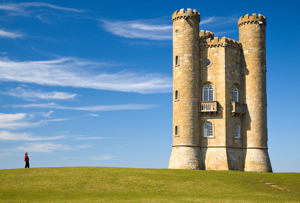
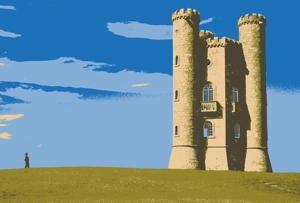

In [12]:
print("Couleurs des classes :")
io.imshow(np.expand_dims(colors,axis=0))
plt.grid()
plt.axis("off")
io.show()

ipyplot.plot_images(images=[Image.fromarray(img),Image.fromarray(new_img)],
                  labels=['original','segmentation'],
                  img_width=300)

## Mise en évidence du "coude"

En appliquant l'algorithme avec plusieurs valeurs de K, nous voyons émerger le fameux "coude".

In [13]:
# chargement des librairies
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import ipyplot
from PIL import Image,ImageFilter,ImageEnhance,ImageChops
from sklearn.cluster import KMeans
from skimage import io,exposure, filters
import ipywidgets as widgets

In [14]:
# application pour différentes valeurs de k
img = np.array(Image.open('./images/supermario_small.jpg'))
data = img.reshape((img.shape[0]*img.shape[1],3), order='C')

k_min = 2
k_max = 12
k = np.arange(k_min,k_max+1,1)
errors = np.zeros(len(k))

progress_bar = widgets.IntProgress(value=k_min,min=k_min,max=k_max,
                                   bar_style='info',orientation='horizontal',
                                   description='Progress:')
display(progress_bar)

for i in range(len(k)):
    model = KMeans(k[i]).fit(data)
    errors[i] = model.inertia_
    progress_bar.value = k[i]
errors = errors/np.max(errors)

IntProgress(value=2, bar_style='info', description='Progress:', max=12, min=2)

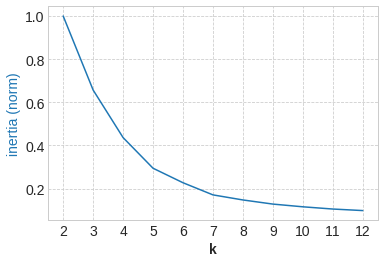

In [15]:
# visualisation de l'inertie
mpl.rcParams["font.size"] = 14
fig, ax1 = plt.subplots(figsize=(15.0/2.54, 10.0/2.54))

color = 'tab:blue'
ax1.set_xlabel('k',fontdict=dict(weight='bold'))
ax1.set_ylabel('inertia (norm)', color=color)
ax1.plot(k, errors, color=color)

plt.grid(True,linestyle='--')
plt.xticks(k)
plt.show()

Le K optimal est entre 4 et 5.

## Module interactif

Nous proposons un module interactif pour explorer la segmentation par K-Means pour différentes images et paramètres différents.

In [16]:
# chargement des librairies
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
import ipyplot
import os
import glob
from PIL import Image,ImageFilter,ImageEnhance,ImageChops
from sklearn.cluster import KMeans
from skimage import io,exposure, filters
from ipywidgets import interact, interact_manual

In [17]:
def get_basename_from_path(filepath):
    filename = os.path.basename(filepath)
    basename, extension = os.path.splitext(filename)
    return basename

In [18]:
def get_img_array_from_path(filepath):
    img = Image.open(filepath)
    array = np.array(img)
    return array

In [19]:
# définition du moteur, nécessite de définir un img_dict{filename:array}
def k_means_segmentation_widget(filename='castle',k=3):
    
    array = img_dict[filename]
    
    if array.ndim ==3:
        n_channels = array.shape[2] # RGB>>3, L>>1
    elif array.ndim == 2:
        n_channels = 1 #assume greyscale
    else:
        raise ValueError('An error occured while reading input. ' \
                        '\nImage array must be of dimension 2 or 3, current is : %.0f' 
                        %(array.ndim))
    n_pixels = array.shape[0]*array.shape[1]    

    data = array.reshape((n_pixels,n_channels), order='C')
    
    n_init = 10
    progress_bar = StreamedProgressBar(n_max=n_init)
    with progress_bar.convert_stdout_to_progress():
        model = KMeans(n_clusters=k,n_init=n_init,verbose=1).fit(data)
        #model = KMeans(k).fit(data)

    colors = model.cluster_centers_.astype('uint8')

    predicted_color_idx = model.predict(data)
    prediction = np.zeros((n_pixels,n_channels), dtype='uint8')
    for i in range(prediction.shape[0]):
        prediction[i] = colors[predicted_color_idx[i]]
    new_array = prediction.reshape(array.shape)
    
    print("Couleurs des classes :")
    io.imshow(np.expand_dims(colors,axis=0))
    plt.grid()
    plt.axis("off")
    io.show()

    ipyplot.plot_images(images=[Image.fromarray(array),Image.fromarray(new_array)],
                      labels=['original','segmentation'],
                      img_width=300)

In [20]:
# chargement des images
img_filepaths = glob.glob("./images/*.jp*g")
img_dict = {get_basename_from_path(path) : get_img_array_from_path(path) 
            for path in img_filepaths}

In [21]:
# définition des curseurs
filename = widgets.Dropdown(options=list(img_dict.keys()),
                            value='castle',description='image')
k = widgets.IntSlider(min=2, max=9, step=1, 
                            value=3,description='k')

In [22]:
# lancement du module
k_means_seg = widgets.interact_manual(k_means_segmentation_widget,
                                      filename=filename,k=k)

interactive(children=(Dropdown(description='image', index=1, options=('bike_sobely', 'castle', 'portrait', 'da…